In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
mode1=df["Age"].mode()
mode1

0    24.0
Name: Age, dtype: float64

In [41]:
mode2=df["Cabin"].mode()
mode2

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [42]:
mode3=df["Embarked"].mode()
mode3

0    S
Name: Embarked, dtype: object

In [43]:
for column in df.columns:
    if column=="Age":
        df[column].fillna(24,inplace=True)
    elif column=="Cabin":
        df[column].fillna("C23 C25 C27", inplace=True)
    elif column=="Embarked":
        df[column].fillna("S", inplace=True)

In [44]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [45]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C23 C25 C27,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,C23 C25 C27,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
df.Sex = df.Sex.apply(lambda x: 1 if x =='male' else 0)
df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

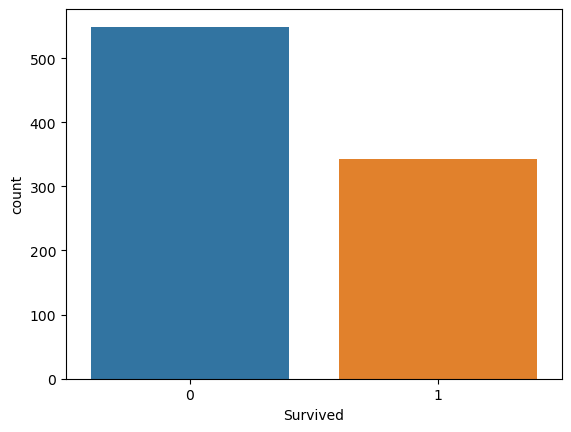

In [47]:
sns.countplot(data=df,x='Survived')

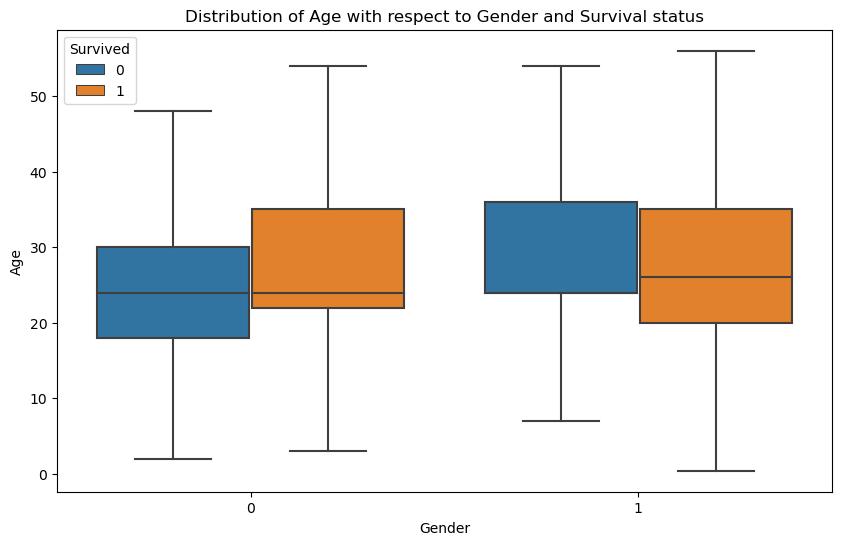

In [56]:
# def remove_out(data):
#     z_scores=(data - data.mean())/data.std()
#     return data[abs(z_scores)<3]

# df['Age']=df.groupby('Sex')['Age'].transform(remove_out)



plt.figure(figsize=(10,6))
sns.boxplot(x='Sex' , y='Age', hue='Survived',data=df, showfliers=False)
plt.title('Distribution of Age with respect to Gender and Survival status')
plt.xlabel('Gender')
plt.ylabel('Age')




plt.show()


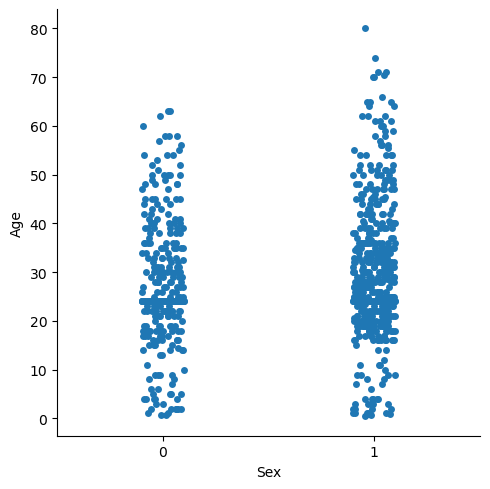

In [49]:
sns.catplot(data=df, x="Sex", y="Age")

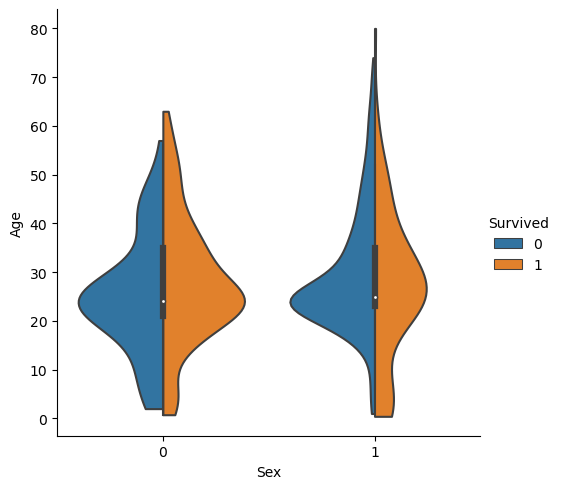

In [50]:
sns.catplot(
    data=df, x="Sex", y="Age", hue="Survived",
    kind="violin", bw_adjust=.5, cut=0, split=True,
)

/home/unix/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Age'>

/home/unix/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/unix/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


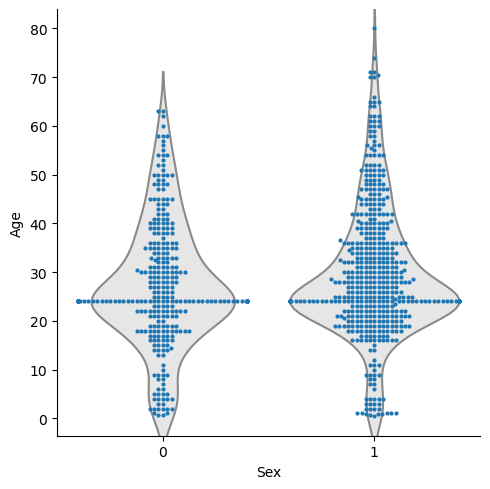

In [51]:
sns.catplot(data=df, x="Sex", y="Age", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="Sex", y="Age", size=3)

<Axes: xlabel='Sex'>

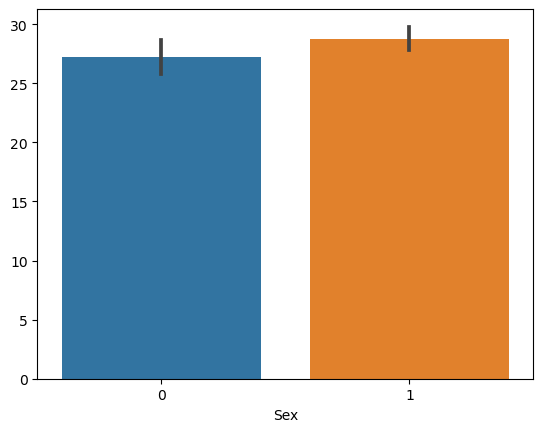

In [36]:
bar = df.pivot(index="PassengerId", columns="Sex", values="Age")
sns.barplot(bar)